In [1]:
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("creditcard.csv")
df=pd.DataFrame(data)

In [4]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
df.shape

(284807, 31)

In [6]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
df=df.sample(frac=0.1,replace=True,random_state=1)
df.shape 

(28481, 31)

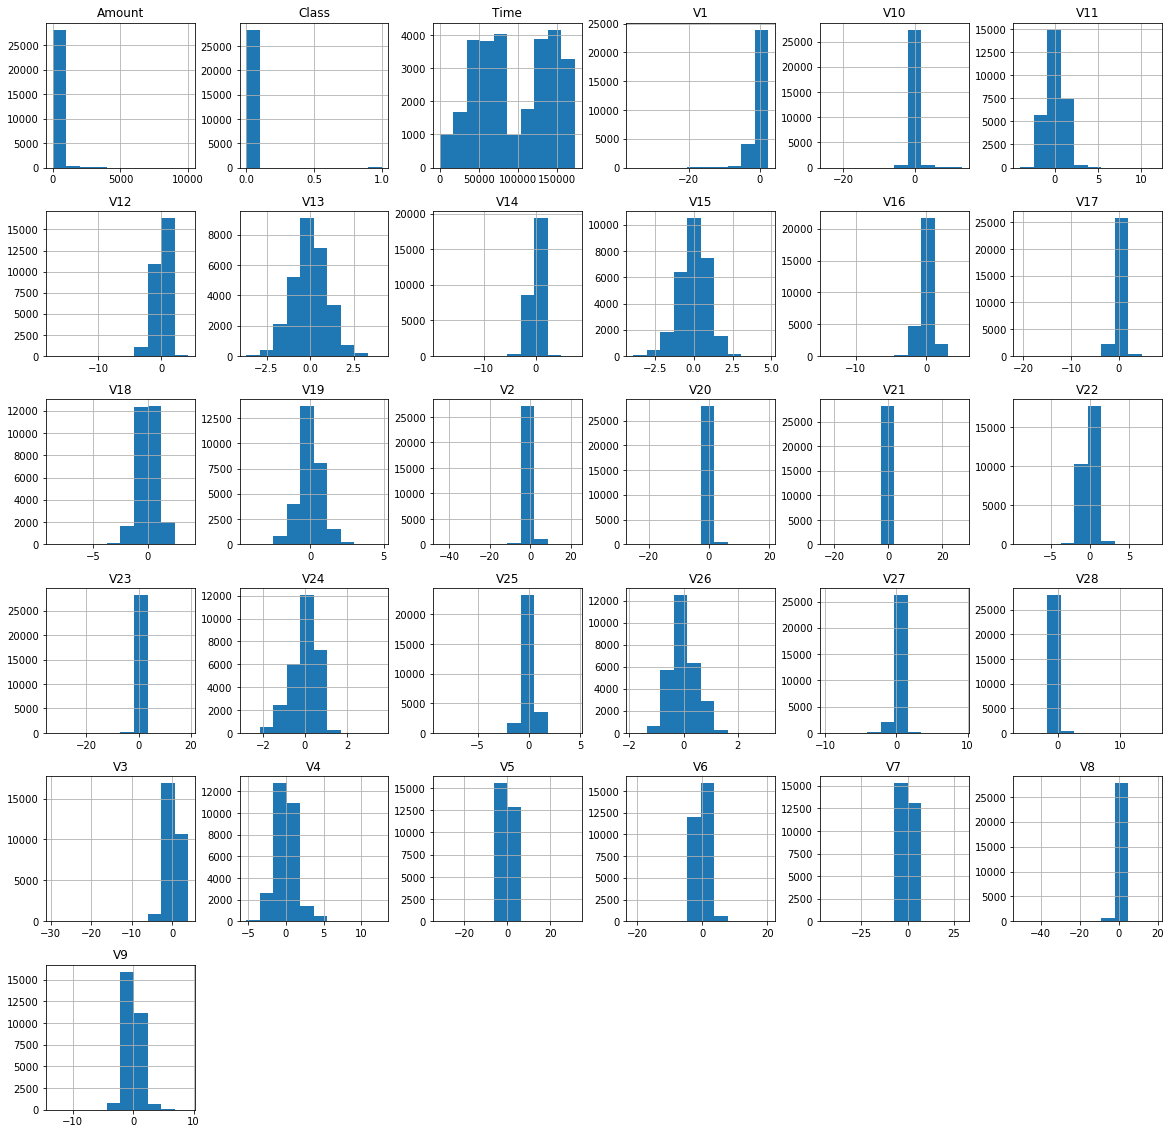

In [8]:
df.hist(figsize=(20,20))
plt.show()

In [9]:
fraud=df[df['Class']==1]
print("No. of Fraud Cases ",len(fraud))
valid=df[df['Class']==0]
print("No.of valid Cases ",len(valid))
outliner_fraction=len(fraud)/float(len(valid))
print("Outliner Fraction ",outliner_fraction)


No. of Fraud Cases  48
No.of valid Cases  28433
Outliner Fraction  0.001688179228361411


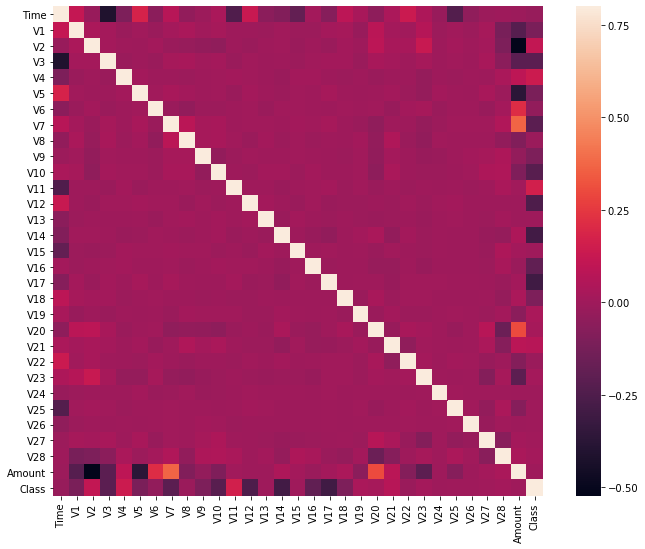

In [10]:
corelation=df.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corelation,vmax=.8,square=True)

In [11]:
columns=df.columns.tolist()
columns=[c for c in columns if c not in['Class']]
target='Class'
X=data[columns]
Y=data[columns]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807, 30)


In [12]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state=1
classifiers={
    "IsolationForest":IsolationForest(max_samples=len(X),contamination=outliner_fraction,random_state=state),
    "LocalOutelierFactor":LocalOutlierFactor(n_neighbors=20,contamination=outliner_fraction)
}

In [ ]:
no_of_outlier=len(fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name=='LocalOutlierFactor':
        y_predict=clf.fit_predict(X)
        scores_predict=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_predict=clf.decision_function(X)
        y_predict=clf.predict(X)
y_predict[y_predict==1]=0
y_predict[y_predict==-1]=1
n_errors=(y_predict!=Y).sum()
print('{}:{}',clf_name,n_errors)
print(accuracy_score(Y,y_predict))
print(classification_report(Y,y_predict))


